# Titanic Dataset - Exploratory Data Analysis (EDA)

## Objective: 
Explore the Titanic dataset to better understand passenger characteristics and find interesting patterns related to survival, age, social class, and other factors.

### Step 1: Import libraries and load data 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load Data 

df = pd.read_csv("/Users/pauli/Documents/Data/titanic_EDA/titanic.csv")

### Step 2: Take a look at the data 

In [13]:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Findings:** The dataset contains 891 rows and 12 columns.
- Column age has 177 missing value, we can handle with median imputation as it is safe and robust.
- Column Cabin has 687 missing values which is around 77% of the data, a very high proportion. Since more than 75% of the values are missing, we do not impute, but instead extract a binary flag (Has_Cabin) to keep some information, and will drop 'Cabin'. 
- Embarked has 2 missing values that will be filled with mode. 

#### Handling Missing Values

In [ ]:
# Fill missing 'Embarked' values with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Age' values with the median age (less sensitive to outliers than the mean)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Create a new column 'Has_Cabin' to indicate whether cabin info is available
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

# Optionally drop the 'Cabin' column since most values are missing
df.drop('Cabin', axis=1, inplace=True)

/var/folders/cq/bs731p7n52x64481gqr1xjvm0000gn/T/ipykernel_90564/2597974837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/var/folders/cq/bs731p7n52x64481gqr1xjvm0000gn/T/ipykernel_90564/2597974837.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

### Step 3:  Univariate Analysis

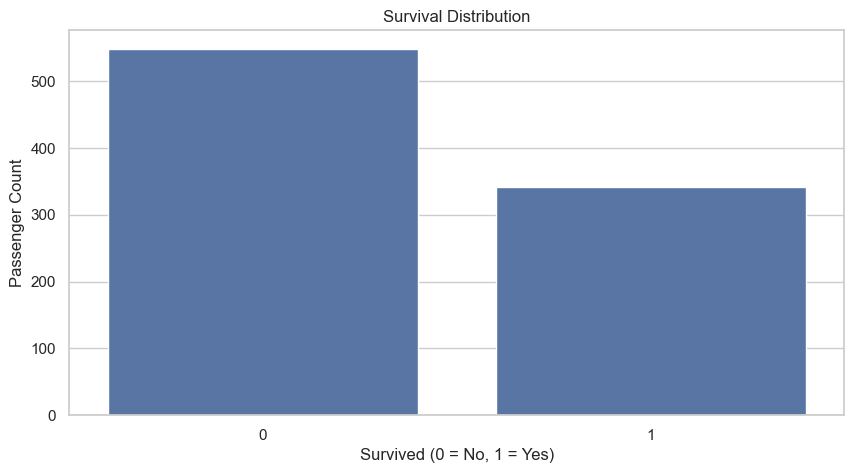

In [16]:
# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 1. Survived
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()


It is observed that there were significantly more passengers who did not survive (0) than those who did (1). This is an important finding of the EDA and reveals that the target variable (Survived) is moderately unbalanced, something to keep in mind if you later decide to do predictive modeling.

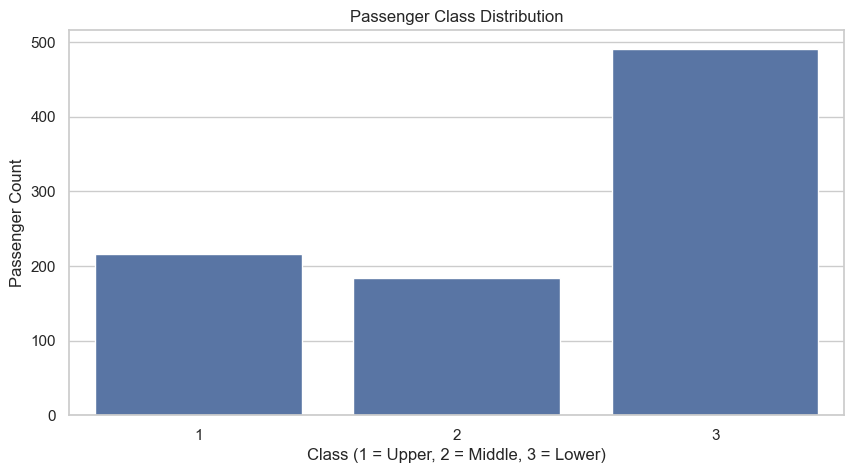

In [17]:
# 2. Pclass
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel('Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Passenger Count')
plt.show()

Most passengers traveled in third class (Class 3), which makes sense considering that tickets were more affordable for the working class.

First class (Class 1) had fewer passengers, likely those with more economic resources.

Second class (Class 2) had the fewest passengers of the three, being an intermediate class.

This graph already provides a starting point for a later analysis of how the survival rate varies between classes, which often shows notable differences.